In [ ]:
!pip install imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors._classification")

# Load the dataset

In [ ]:
df = pd.read_csv('/content/Creditcard_data.csv')

# Removing the label from the dataset

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
z = 1.96
m = 0.05

In [ ]:
n1 = int(np.ceil((z**2 * 0.5 * 0.5) / (m**2)))
n2 = int(np.ceil((z**2 * 0.05 * (1-0.05)) / (m**2)))
n3 = int(np.ceil((z**2 * 0.05 * (1-0.05)) / (m**2)))
n4 = int(np.ceil((z**2 * 0.05 * (1-0.05)) / (m**2)))
n5 = int(np.ceil((z**2 * 0.05 * (1-0.05)) / (m**2)))

# Setting up the Models

**M1: LogisticRegression()**<br>
**M2= DecisionTreeClassifier()**<br>
**M3= RandomForestClassifier()**<br>
**M4= SVC()**<br>
**M5= KNeighborsClassifier()**

In [ ]:
models = {
    'M1': LogisticRegression(),
    'M2': DecisionTreeClassifier(),
    'M3': RandomForestClassifier(),
    'M4': SVC(),
    'M5': KNeighborsClassifier()
}

# Various Sampling Techniques

**These are**<br><br>
Sampling1: RandomOverSampler<br>
Sampling2= RandomUnderSampler<br>
Sampling3= SMOTE<br>
Sampling4= ADASYN<br>
Sampling5= BorderlineSMOTE<br>

In [ ]:
sampling_techniques = {
    'Sampling1': RandomOverSampler(sampling_strategy='minority'),
    'Sampling2': RandomUnderSampler(sampling_strategy='majority'),
    'Sampling3': SMOTE(sampling_strategy='minority'),
    'Sampling4': ADASYN(sampling_strategy='minority'),
    'Sampling5': BorderlineSMOTE(sampling_strategy='minority')
}

In [ ]:
results = {}
for sampler_name, sampler in sampling_techniques.items():
    if sampler_name == 'Sampling1':
        n = n1
    elif sampler_name == 'Sampling2':
        n = n2
    elif sampler_name == 'Sampling3':
        n = n3
    elif sampler_name == 'Sampling4':
        n = n4
    else:
        n = n5

    X_resampled, y_resampled = sampler.fit_resample(X_scaled, y)

    if len(X_resampled) > n:
        X_resampled = X_resampled[:n]
        y_resampled = y_resampled[:n]

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        if model_name in results:
            results[model_name][sampler_name] = accuracy
        else:
            results[model_name] = {sampler_name: accuracy}


# Displaying Results

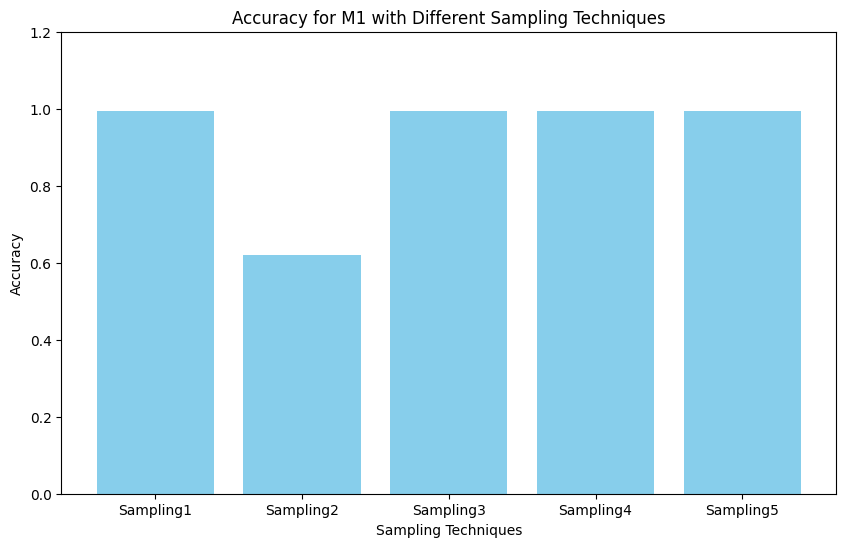

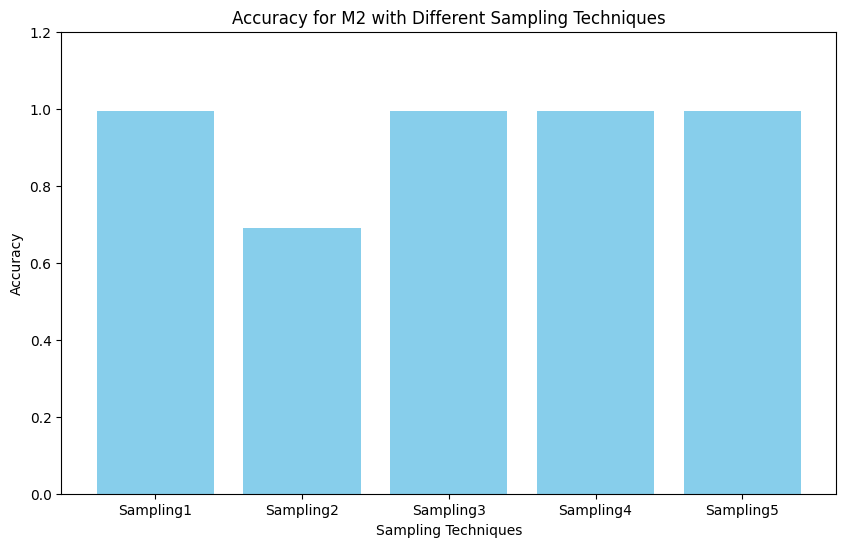

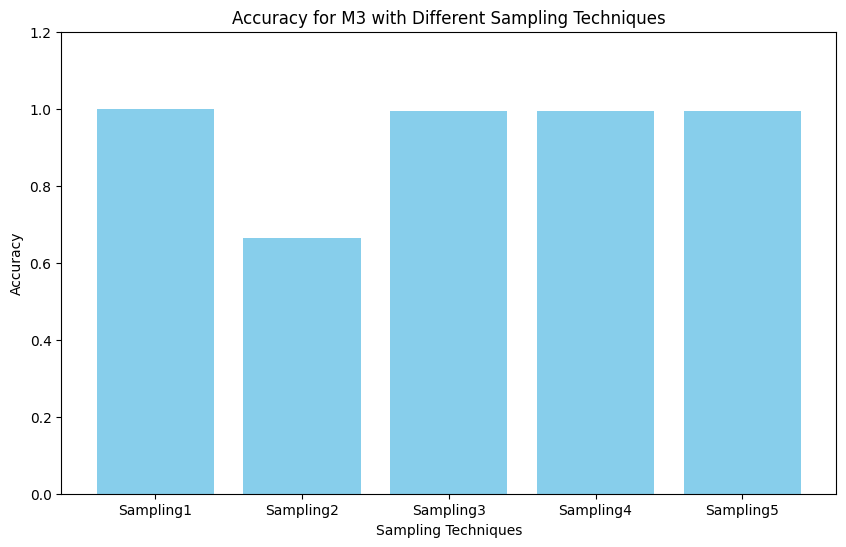

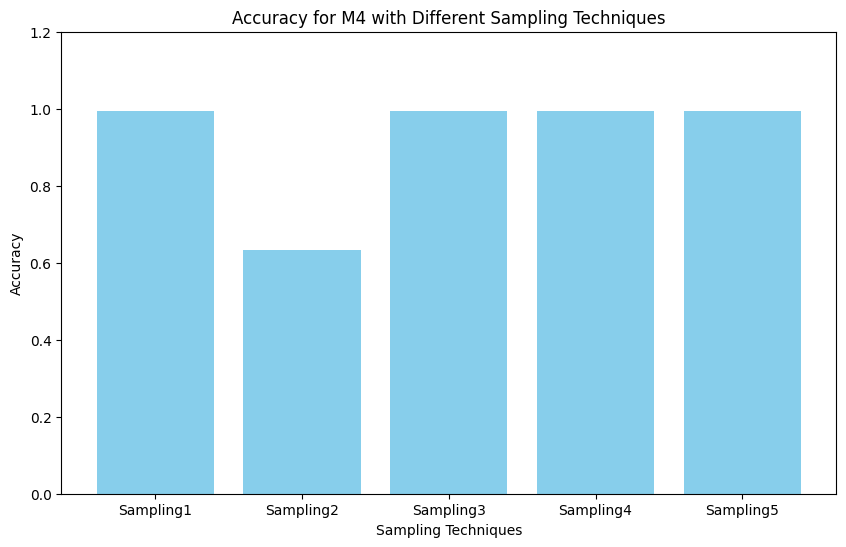

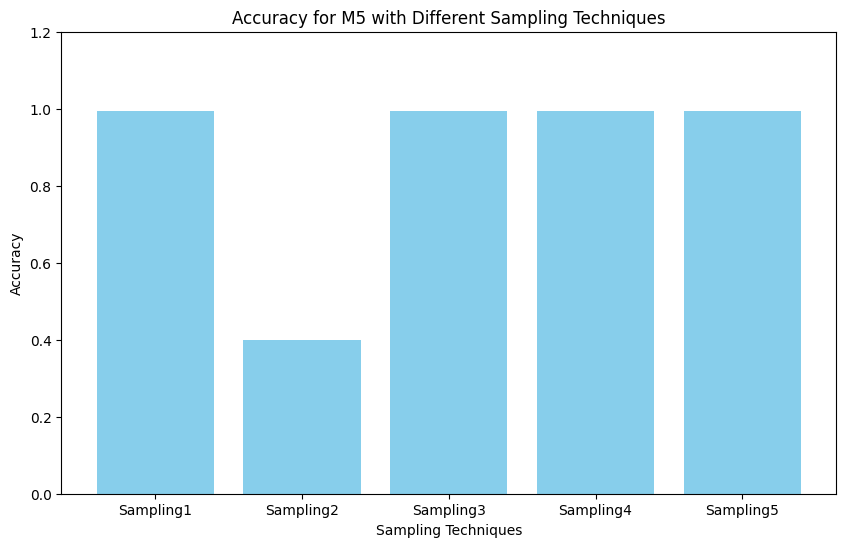

In [ ]:
for model_name in models.keys():
    plt.figure(figsize=(10, 6))
    plt.bar(results[model_name].keys(), results[model_name].values(), color='skyblue')
    plt.title(f'Accuracy for {model_name} with Different Sampling Techniques')
    plt.xlabel('Sampling Techniques')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.2)
    plt.show()

In [ ]:
print('Results:')
print('        Sampling1   Sampling2   Sampling3   Sampling4   Sampling5')
for model_name, model_results in results.items():
    print(model_name, end='')
    for sampler_name in sampling_techniques.keys():
        if sampler_name in model_results:
            print(f'    {model_results[sampler_name]:.4f}   ', end='')
        else:
            print('              ', end='')
    print()

Results:
        Sampling1   Sampling2   Sampling3   Sampling4   Sampling5
M1    0.9935       0.6194       0.9935       0.9935       0.9935   
M2    0.9935       0.6903       0.9935       0.9935       0.9935   
M3    1.0000       0.6645       0.9935       0.9935       0.9935   
M4    0.9935       0.6323       0.9935       0.9935       0.9935   
M5    0.9935       0.4000       0.9935       0.9935       0.9935   


In [ ]:
max_accuracy_model = None
max_accuracy_sampling = None
max_accuracy = 0

for model_name, sampling_dict in results.items():
    for sampling_name, accuracy in sampling_dict.items():
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_accuracy_model = model_name
            max_accuracy_sampling = sampling_name

print(f"Maximum Accuracy: {max_accuracy:.2%}")
print(f"Corresponding Sampling Technique: {max_accuracy_sampling}")
print(f"Corresponding Model: {max_accuracy_model}")
print('=' * 40)

Maximum Accuracy: 100.00%
Corresponding Sampling Technique: Sampling1
Corresponding Model: M3
